In [ ]:
from diffusers import DDPMPipeline
import torch
import numpy as np

image_pipe = DDPMPipeline.from_pretrained("google/ddpm-bedroom-256")
image_pipe.to("cuda")

images = image_pipe().images

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

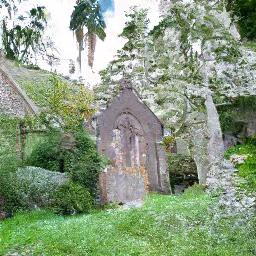

In [2]:
images[0]

In [32]:
@torch.no_grad()
def compute_epsilon(
    unet,
    image,
    device,
    t=999
):      
    
    image = image[None, :]
    image = torch.permute(image, (0, 3, 1, 2))
    image = image.to(device)
    model_output = unet(image, t).sample
    
    return model_output

In [21]:
img = torch.Tensor(np.array(images[0]))

img /= 255
img -= -.5
img *= 2

In [34]:
epsilon = compute_epsilon(image_pipe.unet, img, image_pipe.unet.device)

In [38]:
z = torch.permute(epsilon, (0, 2, 3, 1)) / 2 + 0.5

In [40]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


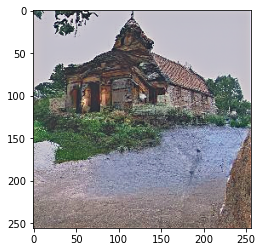

In [44]:
plt.imshow(z.detach().clone().cpu().numpy()[0])

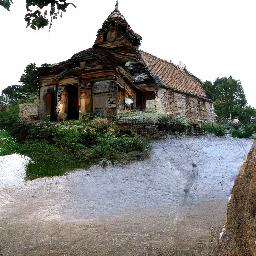

In [45]:
images[0]

In [46]:
image_pipe

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.17.0",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}